# QPSK

Simulating a QPSK system is equivalent to simulating two BPSK systems in parallel. So there is no difference in bit error rate(BER). Since the simulation is at baseband we multiply the in-phase and quadrature streams by 1 and j respectively (instead of cos and sin carriers). At the receiver we just use the real and imag functions to separate the two symbol streams. The BER is the average BER of the two parallel streams.

As in the case of BPSK we can show that the baseband representation (using 1 and j)  is equivalent to using the passband representation (using cosine and sine).

So the transmitted QPSK signal would have the form.

s(t)=a(t)+j*b(t)

The steps involved in the simulation are

1. Generate a random sequence of symbols for the in-phase and quadrature components (-1 corresponding to binary value of 0 and +1 corresponding to binary value of 1). Add the in-phase and quadrature components in the form a(t)+j*b(t).

2. Generate complex samples of Additive White Gaussian Noise (AWGN) with the required variance (noise power = noise variance OR noise power = square of noise standard deviation OR noise power = noise power spectral density * signal bandwidth).

3. Add AWGN samples to the QPSK signal.

4. Detection is performed at the receiver by determining the sign of the in-phase and quadrature components.

5. And finally the bit error rate (BER) is calculated for the in-phase and quadrature components. Total bit error rate is the mean of the two values.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

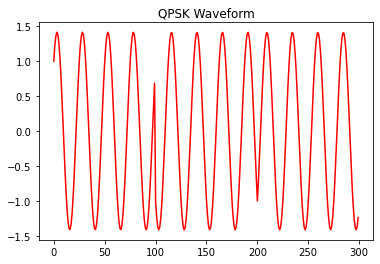

In [8]:
n=10
m=np.random.randint(0,2,n)
#print(m)

even=m[0::2]
even_bits=2*even-1
#print(even_bits)

odd=m[1::2]
odd_bits=2*odd-1
#print(odd_bits)


A=1
f=100
w=100
t=np.linspace(0,6*np.pi,w)

carrier=[A*np.cos(2*np.pi*f*t),A*np.sin(2*np.pi*f*t)]


product_even=[]
product_odd=[]
for t in range(n//2):
    product_even.append(even_bits[t]*carrier[0]) 
    product_odd.append(odd_bits[t]*carrier[1]) 
#print(product_even)
#print(product_odd)

qpsk_even=[k for i in range(n//2) for k in product_even[i] ]
qpsk_odd=[k for i in range(n//2) for k in product_odd[i] ]

#plt.plot(qpsk_even)
#plt.show()

#plt.plot(qpsk_odd)
#plt.show()

qpsk=[qpsk_odd[i]+qpsk_even[i] for i in range(w*(n//2))]
plt.plot(qpsk,"r")
plt.title("QPSK Waveform")
plt.show()

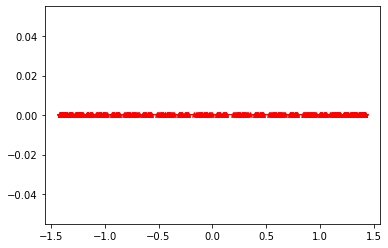

In [8]:
plt.plot(np.real(qpsk),np.imag(qpsk),'r*');

In [7]:
n

10

In [13]:
mod=even_bits+1j*odd_bits
#print(mod)

In [17]:
mod

array([ 1.+1.j, -1.-1.j, -1.+1.j,  1.-1.j, -1.+1.j])

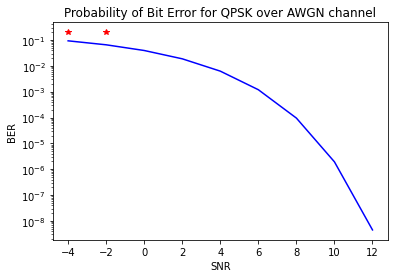

In [24]:
berr=[]

snr = np.arange(start=-4,stop = 13, step = 2)
No=1/(10**(snr/10))
sigma=np.sqrt(No/2) # Finding Noise power
#print(sigma)

for i in range(len(sigma)):
    noise=sigma[i]*np.random.randn(1,n//2)
    rmsg =mod+noise;# Adding noise through channel
#     print(rmsg)
    
    #-------------- Receiver ------------
    
    detectedSyms_odd = (np.imag(rmsg) >= 0).astype(int) #thresolding at value 0
#     print(detectedSyms_odd)
    berr1=np.sum(detectedSyms_odd != odd)/(n//2) #calculate BER1
    
    detectedSyms_even = (np.real(rmsg) >= 0).astype(int) #thresolding at value 0
    berr2=np.sum(detectedSyms_even != even)/(n//2) #calculate BER2
    
    berr.append((berr1+berr2)/2)

    
#print(berr)

from scipy.special import erfc #erfc/Q function
BER_theory = 0.25*erfc(np.sqrt(10**(snr/10)))

plt.semilogy(snr,berr,"r*",snr,BER_theory,"b");
plt.title('Probability of Bit Error for QPSK over AWGN channel');
plt.xlabel("SNR");
plt.ylabel("BER");

In [12]:
np.random.randn(1,n//2)

array([[ 1.0471232 ,  0.08055705,  2.15595547, -0.07468925, -1.28643209]])

In [16]:
sigma

array([1.12068872, 0.8901947 , 0.70710678, 0.56167488, 0.44615422,
       0.35439289, 0.28150428, 0.2236068 , 0.17761719])